In [259]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
city = pd.read_csv('raw_data/city_data.csv')
ride = pd.read_csv('raw_data/ride_data.csv')


In [296]:
city_clean = pd.DataFrame({'type': city.groupby('city').first()['type'],
                                'driver_count': city.groupby('city').sum()['driver_count']}).reset_index()
city_clean

joint = pd.merge(city_clean, ride, on='city', how='outer')
joint.head()

,city,driver_count,type,date,fare,ride_id
0,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
2,Alvarezhaven,21,Urban,2016-09-01 22:57:12,18.09,1197329964911
3,Alvarezhaven,21,Urban,2016-08-18 07:12:06,20.74,357421158941
4,Alvarezhaven,21,Urban,2016-04-04 23:45:50,14.25,6431434271355


In [297]:
#average fare per city
#group the fare by the city and take the average
avg_fare = joint.groupby(['city']).fare.mean()
avg_fare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [298]:
#Total Number of Rides Per City
rides_per_city =joint.groupby(['city']).ride_id.count()
rides_per_city.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [299]:
#total number of drivers per city
#joint.groupby(['driver_count']).city.count()
number_drivers = joint.groupby('city').driver_count.first()
number_drivers.head()

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

In [300]:
# City Type (Urban, Suburban, Rural)
city_type = joint.groupby('city').first()
city_type.head()
#color
#.value_counts()

,driver_count,type,date,fare,ride_id
city,,,,,
Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
Alyssaberg,67,Urban,2016-05-28 09:20:29,35.61,7474701747862
Anitamouth,16,Suburban,2016-01-03 16:21:46,43.54,2473012019465
Antoniomouth,21,Urban,2016-03-05 02:55:42,19.91,644874337642
Aprilchester,49,Urban,2016-05-11 07:04:30,20.29,1081687614611


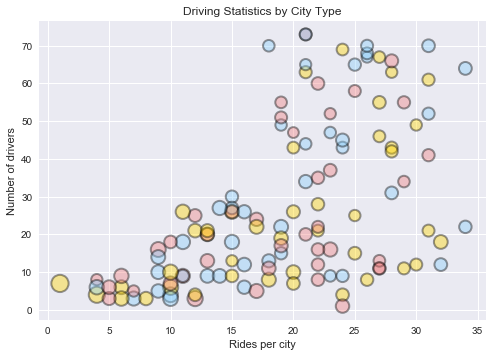

In [310]:
''#pyber = ['Gold', 'Light Sky Blue', 'Light Coral']
#color =  	['#ffd700','#87cefa','#f08080']
# create data
x = rides_per_city
y = number_drivers
z = avg_fare
 #Couldn't figure out how to change the color based on type. Probably a loop through or make a new df. Not sure.
    
# Change color with c and alpha. I map the color to the X axis value.
mainplot = plt.scatter(x, y, s=z*6, alpha=0.4,color = ['#ffd700','#87cefa','#f08080'], edgecolors="black", linewidth=2)


plt.xlabel("Rides per city")
plt.ylabel("Number of drivers")
plt.title("Driving Statistics by City Type")
plt.show()


In [ ]:
''''''

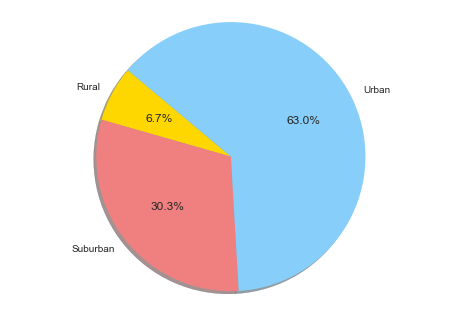

In [283]:
#fares by city type
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", 'Urban']

# The values of each section of the pie chart
sizes = joint.groupby('type').fare.sum()

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.show()

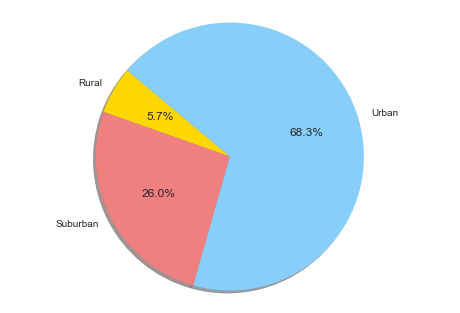

In [284]:
#total rides by city type
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", 'Urban']

# The values of each section of the pie chart
sizes = joint.groupby(['type']).ride_id.sum()

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.show()

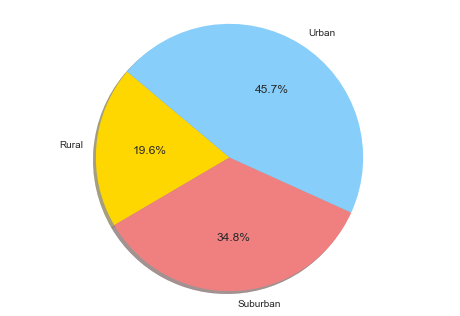

In [285]:
#total drivers by city type
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", 'Urban']

# The values of each section of the pie chart
sizes = joint.groupby(['type']).driver_count.first()

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.show()

In [ ]:
#fg = sns.FacetGrid(data=joint, hue='type', hue_order=["Urban", "Suburban", 'Rural'], palette=pal)
#fg.map(mainplot)
#gold, light sky bluw, light coral
# Add titles (main and on axis)
#pal = dict(Urban="#ffd700", Suburban='#87cefa', Rural="#f08080")